In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
files = [
    'https://www.dropbox.com/s/1n370e0cxlh50fc/ARB_HIST_ALAMEDA_v3.zip?dl=1',
    'https://www.dropbox.com/s/6owx081opq4dbfu/ARB_HIST_CONTRA_COSTA_v3.zip?dl=1',
    'https://www.dropbox.com/s/u7gc5hotzeddu8k/ARB_HIST_MARIN_v3.zip?dl=1',
    'https://www.dropbox.com/s/2shn4eyxn6yx12u/ARB_HIST_NAPA_v3.zip?dl=1',
    'https://www.dropbox.com/s/hp3eyabjiy8andw/ARB_HIST_SAN_FRANCISCO_v3.zip?dl=1',
    'https://www.dropbox.com/s/f9qg8z7ucon7htm/ARB_HIST_SAN_MATEO_v3.zip?dl=1',
    'https://www.dropbox.com/s/iqef06jgn13g747/ARB_HIST_SANTA_CLARA_v3.zip?dl=1',
    'https://www.dropbox.com/s/8nc4gj3t34zcrbg/ARB_HIST_SOLANO_v3.zip?dl=1',
    'https://www.dropbox.com/s/g1vw02o3nfh5iz1/ARB_HIST_SONOMA_v3.zip?dl=1'
]

In [4]:
%%time
df = pd.concat([pd.read_csv(url, compression='zip', low_memory=False) for url in files])

CPU times: user 1min 10s, sys: 26.2 s, total: 1min 36s
Wall time: 1min 51s


In [5]:
len(df)

2147507

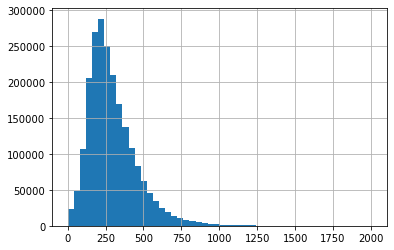

In [6]:
df.ucb_price_sqft_adj.hist(bins=50)

NameError: name 'extent' is not defined

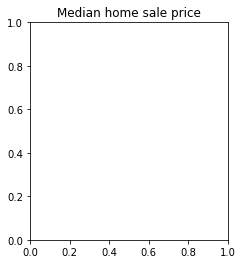

In [7]:
fig, ax = plt.subplots()

ax.set_aspect(1.1)
ax.set_title("Median home sale price")

#states.plot(ax=ax, color='white', edgecolor='grey', zorder=1)

data = df
values = data.ucb_price_sqft_adj
hb = ax.hexbin(data.sa_x_coord*-1, data.sa_y_coord, C=values, reduce_C_function=np.median, 
                extent=extent, mincnt=50, gridsize=50, linewidths=0, cmap='viridis', zorder=2)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Dollars per square foot')

plt.show()